In [84]:
import pandas as pd
import re
from tqdm import tqdm_notebook as tqdm
import string
import pickle
tqdm().pandas()
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 15]

## Finding main objects

In [32]:
def datafram_from_csv(file_path):
    df = pd.read_csv(file_path, sep='|',names=['image','objects'])
    return df

In [33]:
def get_concat_data(list_of_files):
    list_of_df = [datafram_from_csv(i) for i in list_of_files]
    df = pd.concat(list_of_df, axis=0, ignore_index=True)
    return df

In [34]:
df = get_concat_data(['data/DATA_I_MADE/normal_images_analysis.csv','data/DATA_I_MADE/troll_images_analysis.csv'])

In [35]:
df.head()

,image,objects
0,file:///media/hitkul/DATA/Acadmics/PhD_IIIT_De...,"women, party"
1,file:///media/hitkul/DATA/Acadmics/PhD_IIIT_De...,"building, men"
2,file:///media/hitkul/DATA/Acadmics/PhD_IIIT_De...,feeling
3,file:///media/hitkul/DATA/Acadmics/PhD_IIIT_De...,"big_tattoo, aggressive_tattoo"
4,file:///media/hitkul/DATA/Acadmics/PhD_IIIT_De...,"big_tattoo, aggressive_tattoo"


In [36]:
duplicate_map = {
'bikes':'bike',
'cothes':'clothes',
'group_people':'people',
'materialistic_things':'',
'painting_women':'painting_woman',
'posing':''
}

In [37]:
high_object = [j.strip().lower() for i in tqdm(df['objects'].tolist()) for j in i.split(',')]

In [38]:
high_object = [duplicate_map[i] if i in duplicate_map.keys() else i for i in high_object]
high_object = [word for word in high_object if word not in ['']]

In [39]:
unique_objects = set(high_object)
len(unique_objects)

145

In [40]:
unique_objects

{'accidents',
 'advt',
 'affection',
 'aggressive_tattoo',
 'animalprint_clothes',
 'baby',
 'bad_tattoo',
 'bags',
 'band',
 'baseball',
 'basketball',
 'big_tattoo',
 'bike',
 'black_kid',
 'black_kids',
 'black_man',
 'black_men',
 'black_woman',
 'broken_car',
 'building',
 'burn_money',
 'cap',
 'car',
 'cartoon',
 'cat',
 'celebrity',
 'city',
 'clothes',
 'colors',
 'computer',
 'cuple_painting',
 'custom_bike',
 'custom_car',
 'cute_tattoo',
 'cybeorg_tattoo',
 'cycle',
 'cycling',
 'depressing_thought',
 'disabled_man',
 'dj',
 'dog',
 'drinking_man',
 'drinking_women',
 'driving',
 'drugs',
 'edited',
 'enacting_wolverine',
 'excersise',
 'fake_bag',
 'fake_shoes',
 'fakehair_woman',
 'fat_man',
 'fat_woman',
 'feeling',
 'field',
 'fish',
 'fit_man',
 'food',
 'football',
 'fuck_sign',
 'funny',
 'gangsign',
 'gangster',
 'garbage',
 'gifts',
 'golf',
 'group_women_man',
 'guitar',
 'guns',
 'handicap',
 'ice_hockey',
 'insect',
 'interview',
 'kid',
 'kids',
 'lips',
 'loos

## Objects in each row

In [47]:
def pre_process_class(objects_str):
    high_object = [j.strip().lower() for j in objects_str.split(',')]
    high_object = [duplicate_map[i] if i in duplicate_map.keys() else i for i in high_object]
    high_object = [word for word in high_object if word not in ['']]
    return list(set(high_object))

In [48]:
def get_object_in_row(row):
    return pre_process_class(row['objects'])

In [49]:
df['objects'] = df.progress_apply(lambda row: get_object_in_row(row),axis=1)

In [50]:
df.head()

,image,objects
0,file:///media/hitkul/DATA/Acadmics/PhD_IIIT_De...,"[women, party]"
1,file:///media/hitkul/DATA/Acadmics/PhD_IIIT_De...,"[building, men]"
2,file:///media/hitkul/DATA/Acadmics/PhD_IIIT_De...,[feeling]
3,file:///media/hitkul/DATA/Acadmics/PhD_IIIT_De...,"[aggressive_tattoo, big_tattoo]"
4,file:///media/hitkul/DATA/Acadmics/PhD_IIIT_De...,"[aggressive_tattoo, big_tattoo]"


## Finding mapping

In [56]:
def get_label(row):
    return row['image'].replace('file:///media/hitkul/DATA/Acadmics/PhD_IIIT_Delhi/NII/image_hate/data/DATA_I_MADE/Images/','').split('/')[0]

In [58]:
df.head()

,image,objects
0,file:///media/hitkul/DATA/Acadmics/PhD_IIIT_De...,"[women, party]"
1,file:///media/hitkul/DATA/Acadmics/PhD_IIIT_De...,"[building, men]"
2,file:///media/hitkul/DATA/Acadmics/PhD_IIIT_De...,[feeling]
3,file:///media/hitkul/DATA/Acadmics/PhD_IIIT_De...,"[aggressive_tattoo, big_tattoo]"
4,file:///media/hitkul/DATA/Acadmics/PhD_IIIT_De...,"[aggressive_tattoo, big_tattoo]"


In [59]:
df['label'] = df.progress_apply(lambda row: get_label(row),axis=1)

In [73]:
df.head()

,image,objects,label
0,file:///media/hitkul/DATA/Acadmics/PhD_IIIT_De...,"[women, party]",Normal
1,file:///media/hitkul/DATA/Acadmics/PhD_IIIT_De...,"[building, men]",Normal
2,file:///media/hitkul/DATA/Acadmics/PhD_IIIT_De...,[feeling],Normal
3,file:///media/hitkul/DATA/Acadmics/PhD_IIIT_De...,"[aggressive_tattoo, big_tattoo]",Normal
4,file:///media/hitkul/DATA/Acadmics/PhD_IIIT_De...,"[aggressive_tattoo, big_tattoo]",Normal


In [74]:
df.label.value_counts()

Trolled    557
Normal     541
Name: label, dtype: int64

In [75]:
df.shape

(1098, 3)

Count of objects

In [76]:
objects_list = df['objects'].tolist()

In [77]:
unique_objs = set([obj for objs in objects_list for obj in objs])

In [78]:
object_count = dict()

In [79]:
for objs in objects_list:
    for obj in objs:
        if obj not in object_count.keys():
            object_count[obj]=0
        object_count[obj]+=1

In [81]:
object_count

{'women': 23,
 'party': 14,
 'building': 1,
 'men': 33,
 'feeling': 30,
 'aggressive_tattoo': 25,
 'big_tattoo': 42,
 'cute_tattoo': 1,
 'religious_tattoo': 4,
 'skateboard': 8,
 'playing': 1,
 'food': 24,
 'painting_woman': 3,
 'smoking_man': 4,
 'kid': 6,
 'affection': 2,
 'custom_bike': 1,
 'man': 94,
 'fit_man': 10,
 'shoes': 24,
 'religious_text': 20,
 'tickets': 1,
 'lips': 1,
 'other': 106,
 'stunt': 13,
 'people': 22,
 'garbage': 1,
 'field': 5,
 'text': 6,
 'screenshot': 13,
 'religious': 11,
 'sexual_tatto': 1,
 'dog': 5,
 'poster': 1,
 'sexual': 20,
 'wwe': 22,
 'cat': 3,
 'tragedy': 5,
 'painting': 11,
 'black_man': 57,
 'drugs': 28,
 'tattoo': 2,
 'cartoon': 6,
 'fat_man': 8,
 'man_woman': 21,
 'car': 8,
 'computer': 1,
 'depressing_thought': 11,
 'advt': 12,
 'meme': 69,
 'woman': 74,
 'nudity': 32,
 'black_men': 21,
 'makeup': 2,
 'kids': 6,
 'vent_below': 11,
 'broken_car': 1,
 'cycle': 1,
 'smoking': 1,
 'accidents': 6,
 'question': 1,
 'motivation_text': 11,
 'city': 

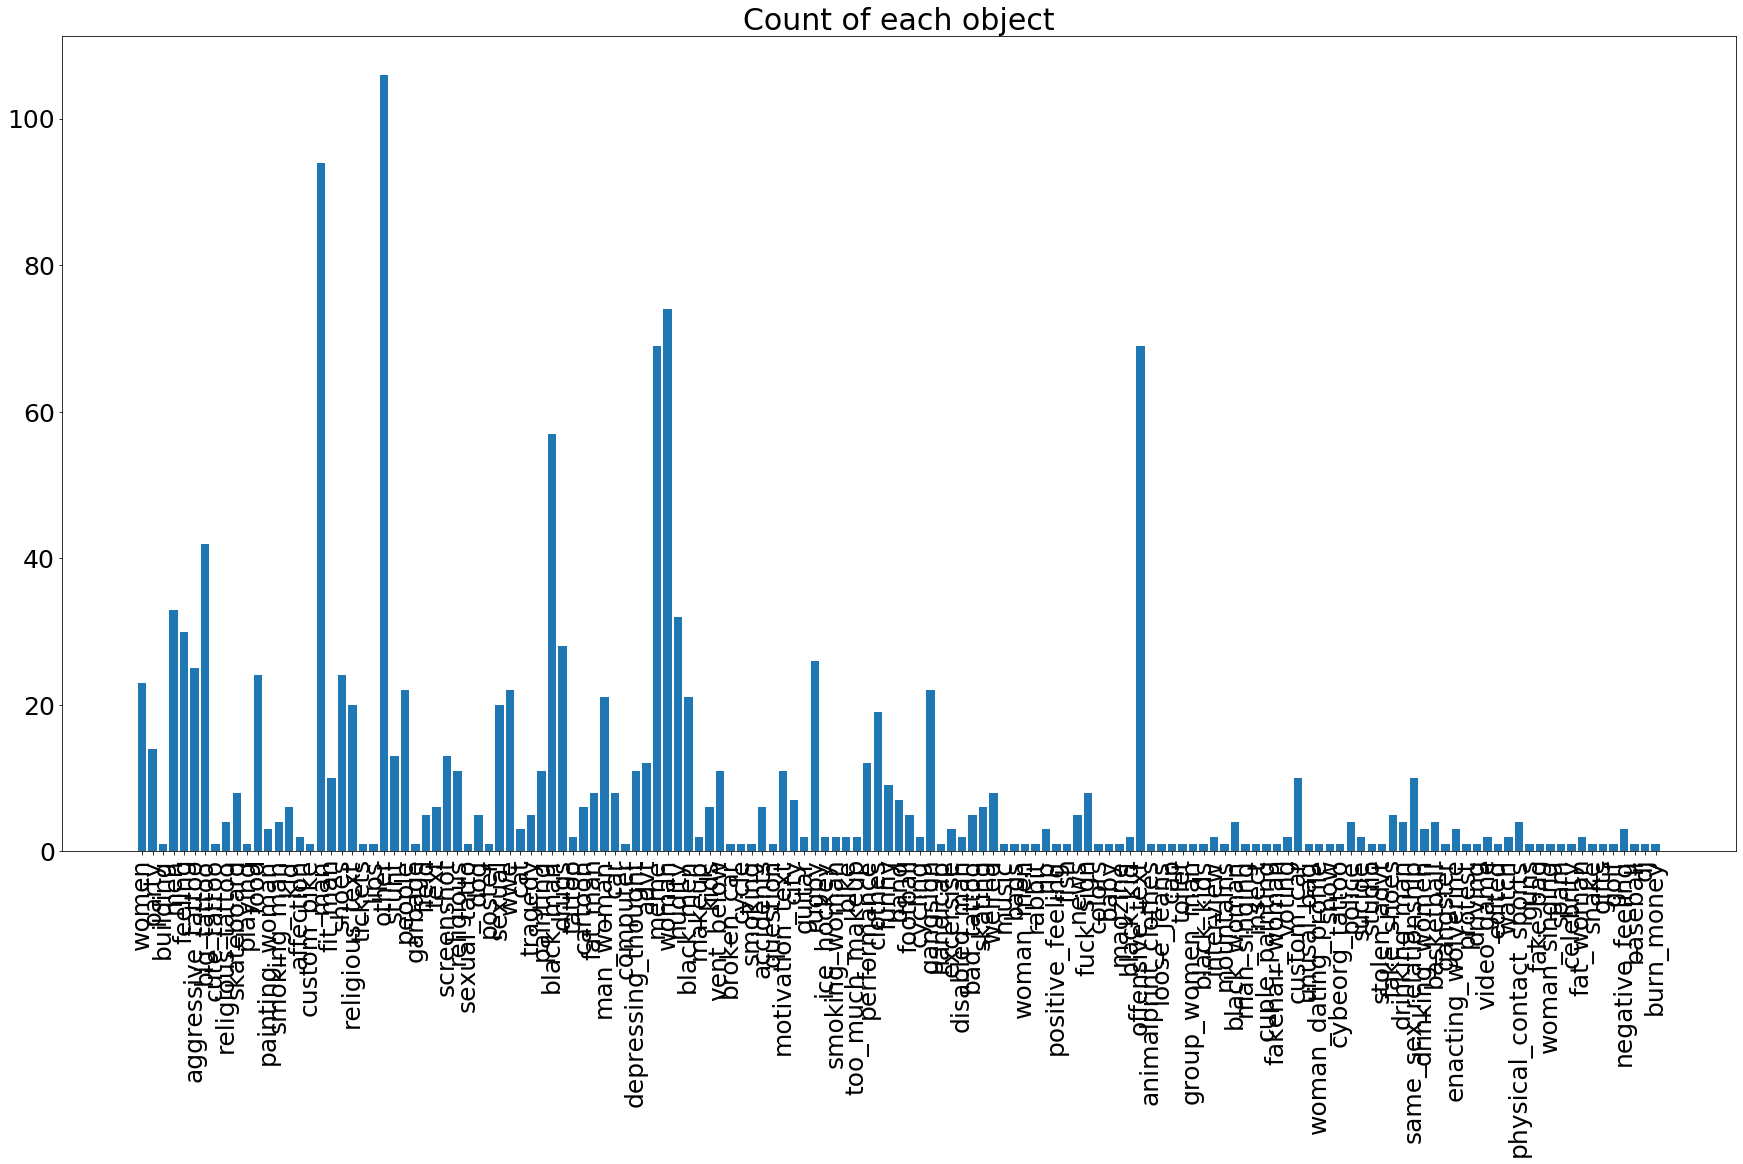

In [85]:
plt.bar(object_count.keys(), object_count.values())
plt.xticks(fontsize=25,rotation='vertical');
plt.yticks(fontsize=25);
plt.title('Count of each object',fontsize=30);

Making count dicts

In [90]:
def create_object_count_dict(dataframe):
    obj_list = dataframe['objects'].tolist()
    label = dataframe['label'].tolist()
    assert len(obj_list) == len(label)
    count_dict = dict()
    for objs,l in zip(obj_list,label):
        for obj in objs:
            if obj not in count_dict.keys():
                count_dict[obj] = {'Normal':0,'Trolled':0}
            count_dict[obj][l]+=1
    return count_dict

In [91]:
full_data_object_label_count_dict = create_object_count_dict(df)

In [92]:
full_data_object_label_count_dict

{'women': {'Normal': 12, 'Trolled': 11},
 'party': {'Normal': 5, 'Trolled': 9},
 'building': {'Normal': 1, 'Trolled': 0},
 'men': {'Normal': 17, 'Trolled': 16},
 'feeling': {'Normal': 28, 'Trolled': 2},
 'aggressive_tattoo': {'Normal': 25, 'Trolled': 0},
 'big_tattoo': {'Normal': 39, 'Trolled': 3},
 'cute_tattoo': {'Normal': 1, 'Trolled': 0},
 'religious_tattoo': {'Normal': 3, 'Trolled': 1},
 'skateboard': {'Normal': 8, 'Trolled': 0},
 'playing': {'Normal': 1, 'Trolled': 0},
 'food': {'Normal': 21, 'Trolled': 3},
 'painting_woman': {'Normal': 3, 'Trolled': 0},
 'smoking_man': {'Normal': 3, 'Trolled': 1},
 'kid': {'Normal': 6, 'Trolled': 0},
 'affection': {'Normal': 2, 'Trolled': 0},
 'custom_bike': {'Normal': 1, 'Trolled': 0},
 'man': {'Normal': 50, 'Trolled': 44},
 'fit_man': {'Normal': 10, 'Trolled': 0},
 'shoes': {'Normal': 18, 'Trolled': 6},
 'religious_text': {'Normal': 12, 'Trolled': 8},
 'tickets': {'Normal': 1, 'Trolled': 0},
 'lips': {'Normal': 1, 'Trolled': 0},
 'other': {'No

In [95]:
def plot_object_label_count(obj_label_count_dic):
    objs = obj_label_count_dic.keys()
    normal = [obj_label_count_dic[i]['Normal'] for i in objs]
    trolled = [obj_label_count_dic[i]['Trolled'] for i in objs]
    
    ind = pd.np.arange(len(objs))
    p1 = plt.bar(ind, normal)
    p2 = plt.bar(ind, trolled,bottom=normal)

    plt.ylabel('Count')
    plt.title('Count of labels for each Objects',fontsize=30)
    plt.xticks(ind, objs,fontsize=25,rotation='vertical')
    plt.yticks(fontsize=25)
    plt.legend((p1[0], p2[0]), ('Normal', 'Trolled'),fontsize=25)

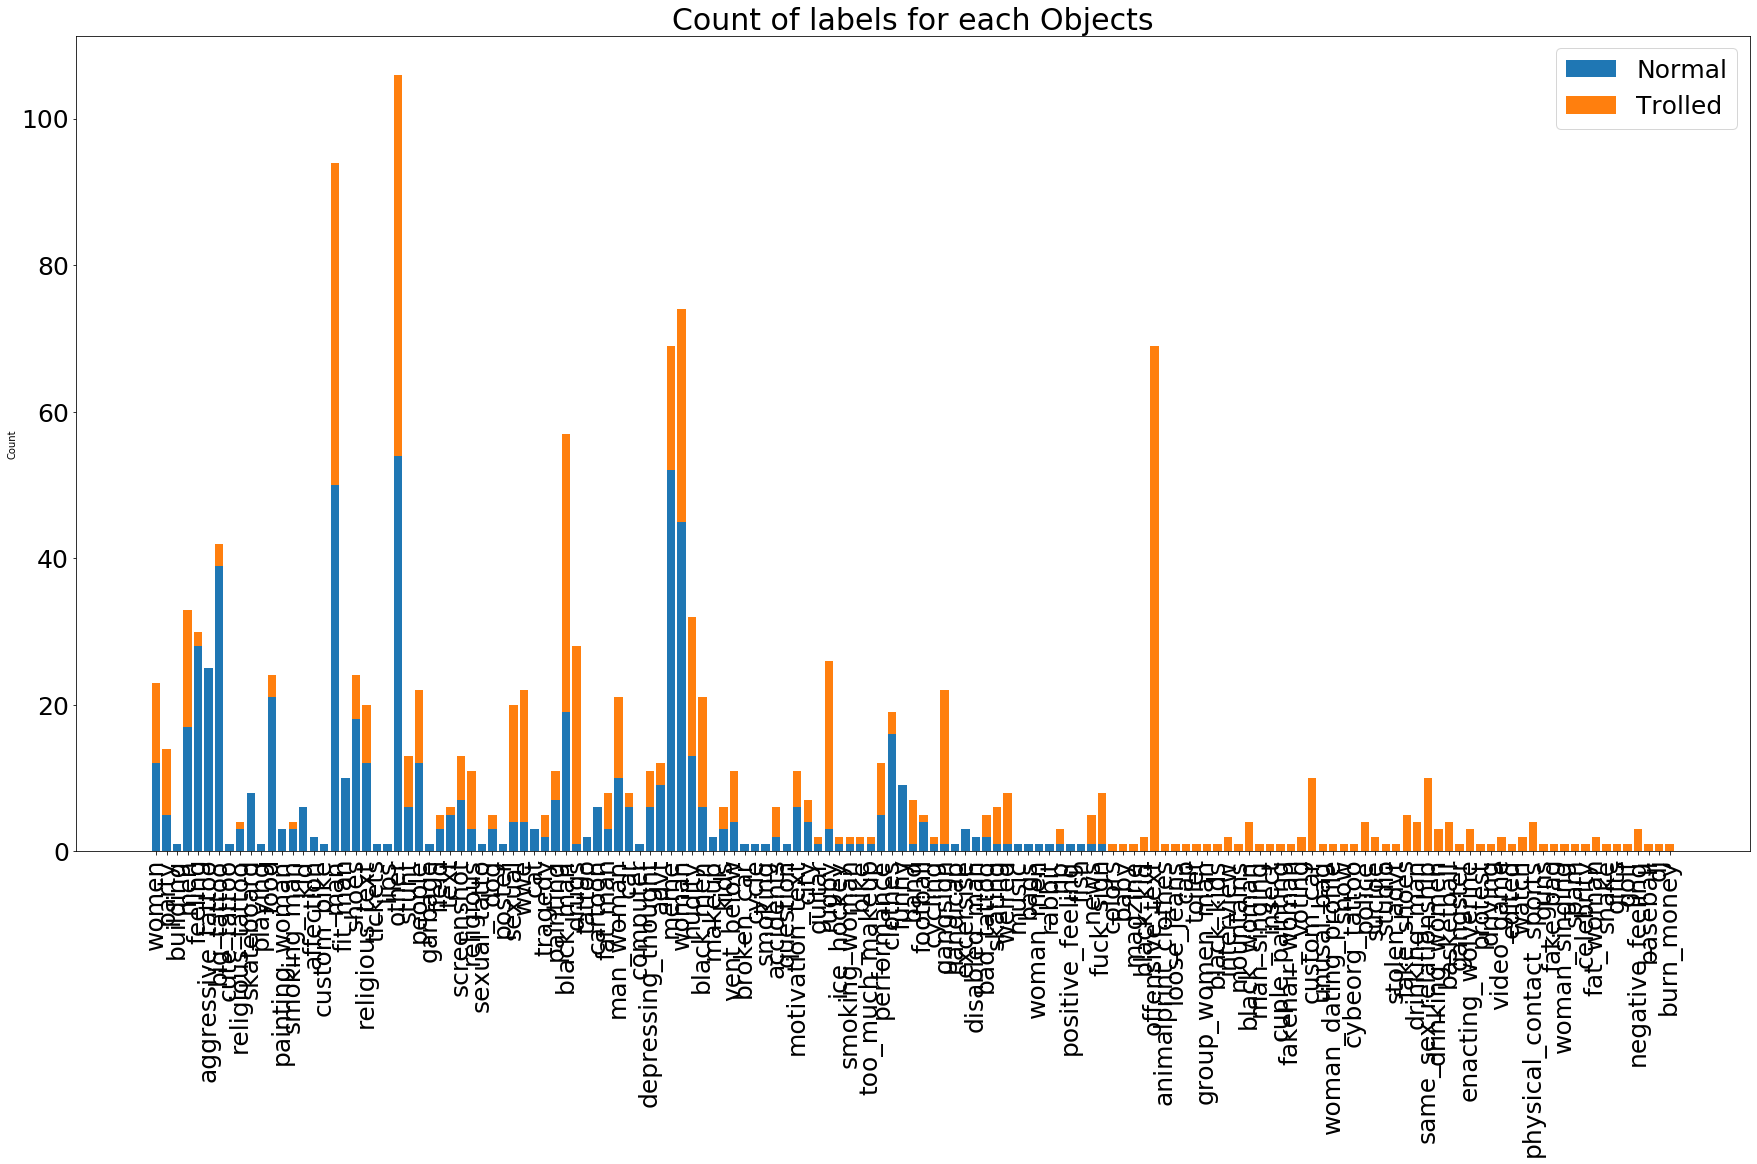

In [96]:
plot_object_label_count(full_data_object_label_count_dict)